In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
static = pd.read_csv('../data/static_cleaned.csv')

static.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
0,23169158,3/12/27 1:19,3/19/27 13:15,3/12/27 2:43,3/15/27 1:53,2.97,0,0,WHITE,84.191979,...,1,0,1,1,0,0,1,1,0,0
1,29179088,4/10/80 23:21,4/17/80 14:00,4/12/80 17:41,4/16/80 13:38,3.83,0,1,WHITE,72.276455,...,1,1,1,1,0,1,0,1,1,0
2,27139242,4/25/33 5:47,5/13/33 7:15,4/25/33 6:37,4/27/33 16:01,2.39,0,1,BLACK/AFRICAN AMERICAN,73.312782,...,0,1,0,0,0,0,0,0,0,0
3,25918892,10/27/43 15:06,10/31/43 14:21,10/27/43 15:06,10/30/43 12:11,2.88,0,1,WHITE,91.820358,...,0,0,0,0,0,0,0,1,1,1
4,20778724,10/4/67 7:15,10/19/67 17:45,10/5/67 9:23,10/6/67 21:43,1.51,0,1,ASIAN - CHINESE,63.756003,...,1,0,1,1,0,0,0,1,0,1


In [3]:
static.shape

(9696, 24)

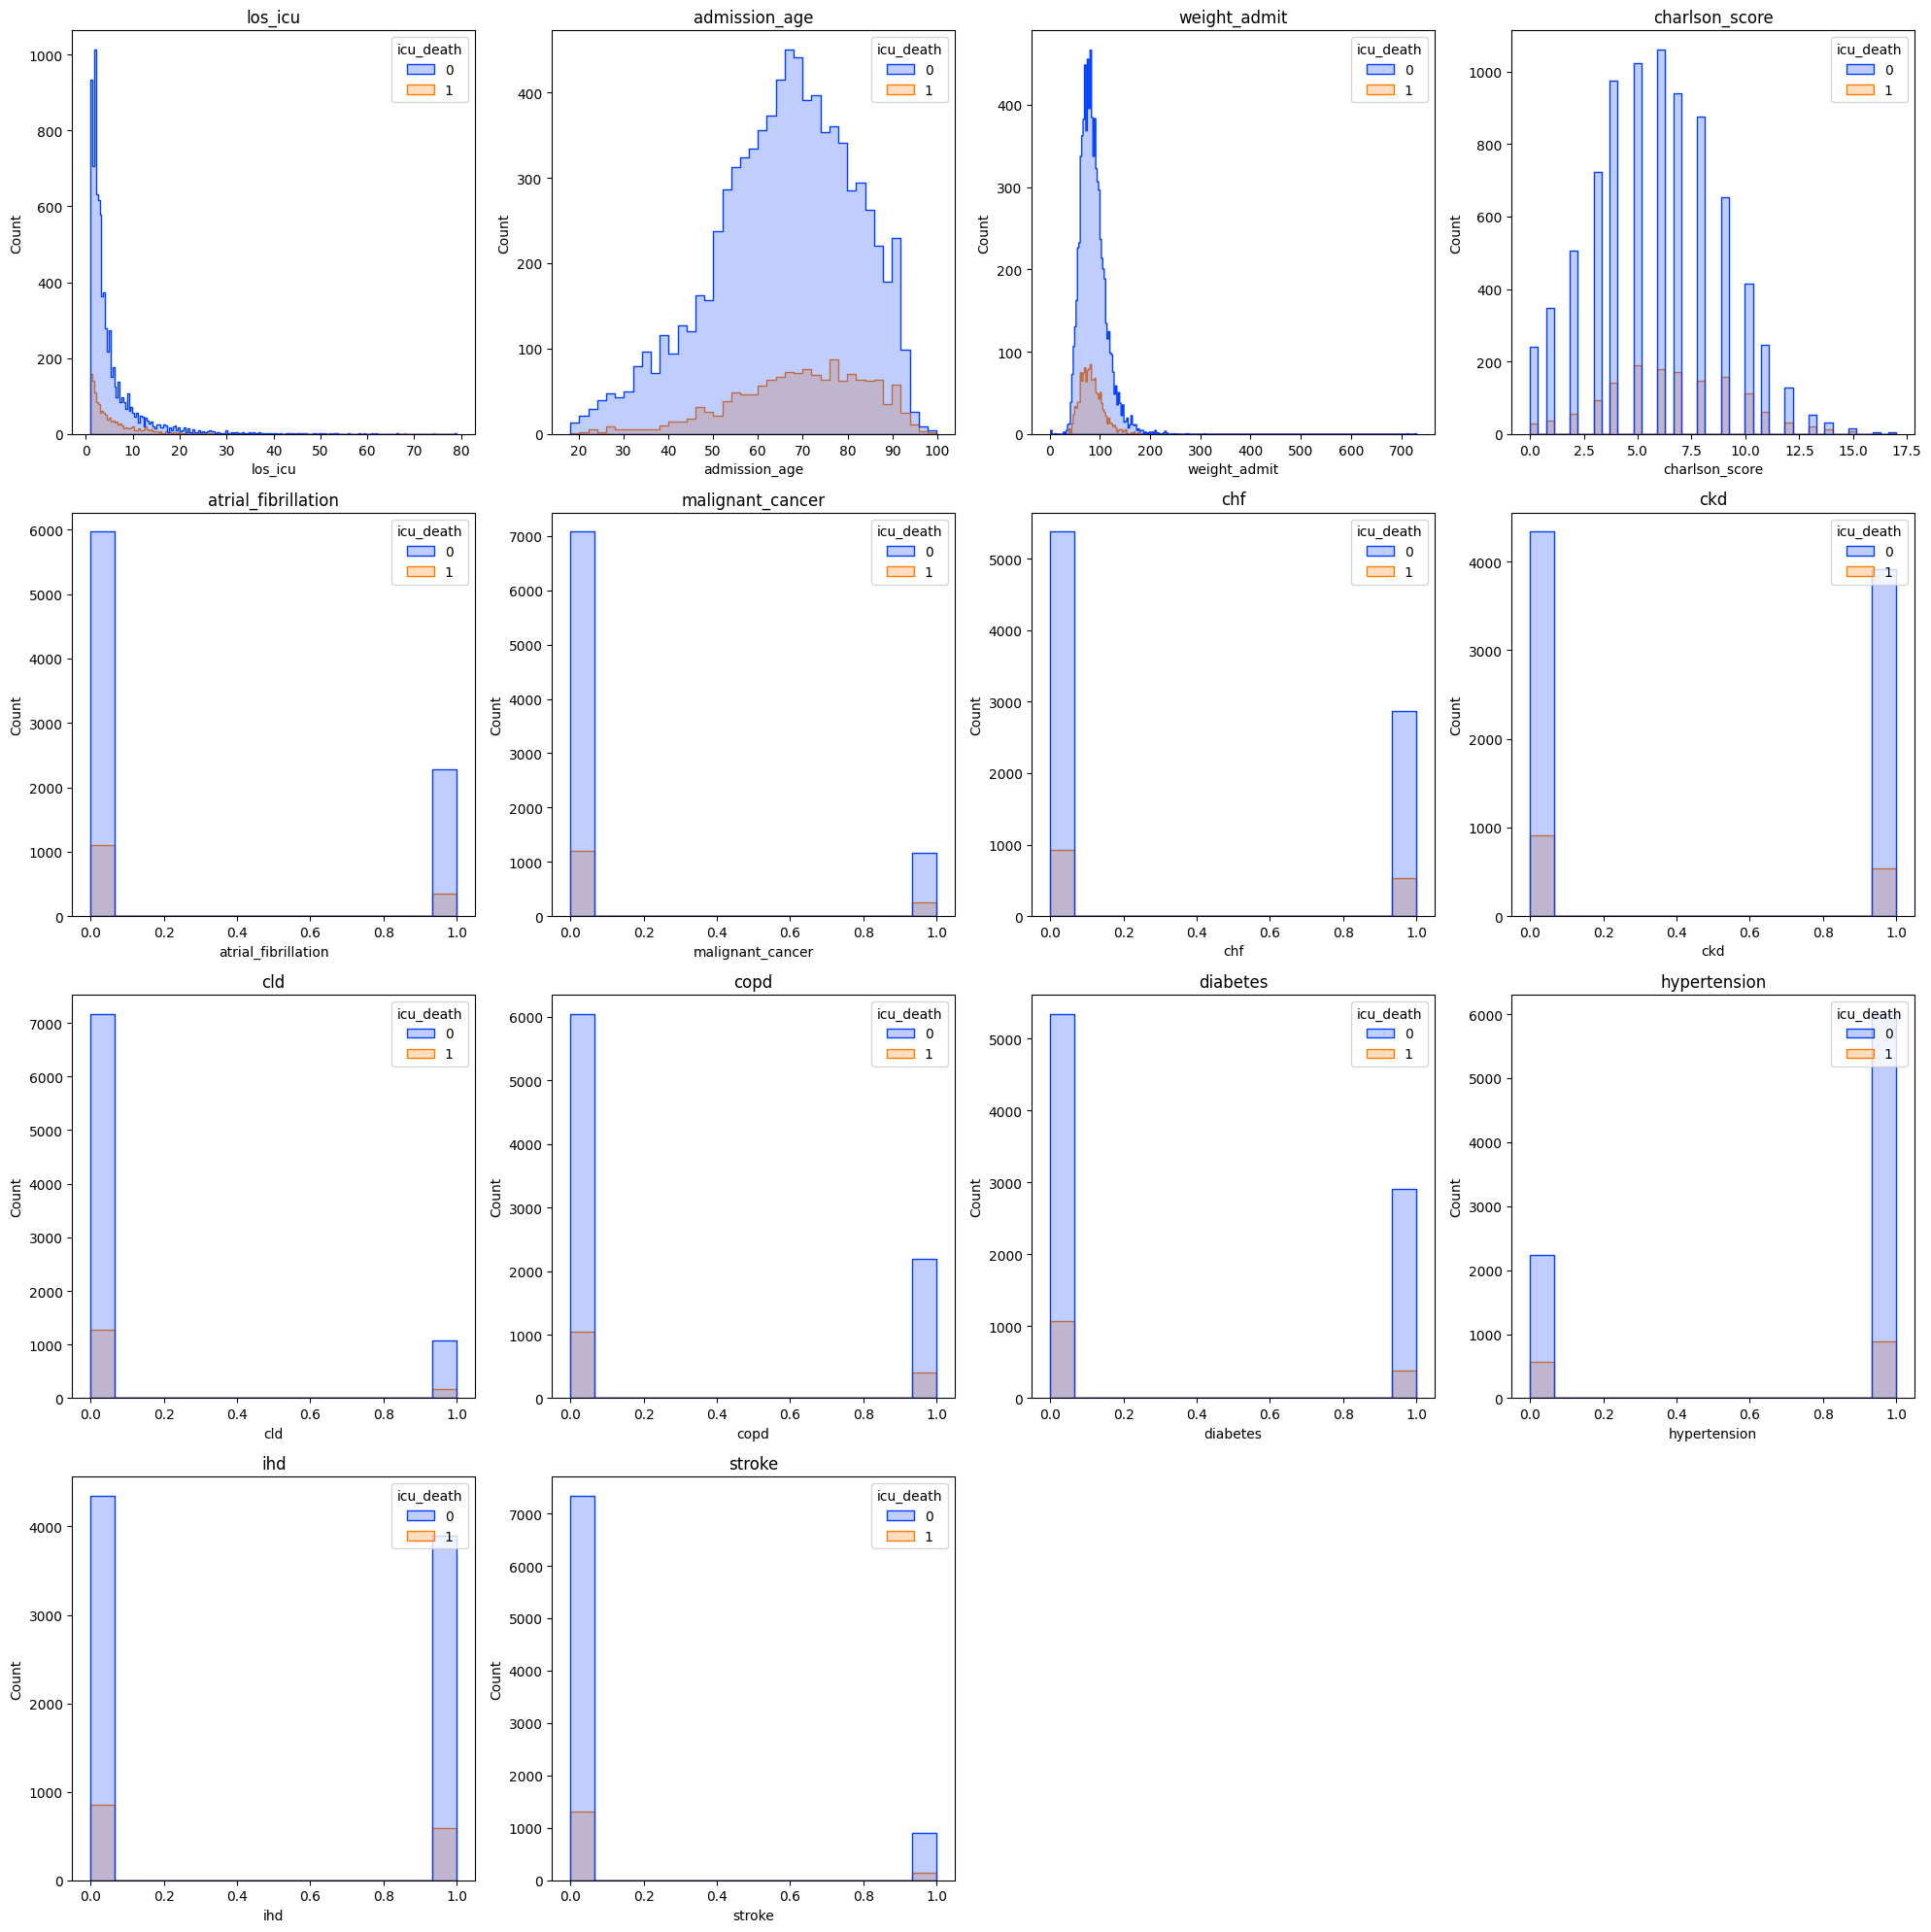

In [14]:
invalid_cols = ['id', 'icu_death', 'gender']

numeric_cols = static[[col for col in static.columns if col not in invalid_cols]].select_dtypes(include=[np.number]).columns.tolist()

n_rows = 4
n_cols = 4

plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=static, x=col, kde=False, hue='icu_death', element='step', palette='bright')
    plt.title(col)

plt.tight_layout()
plt.savefig('../data/figures/feature-distribution.png') 
plt.show()